## 개요


- 정규화 : Min-Max Scaler  
- 활성화함수 : 하이퍼볼릭탄젠트  
- 옵티마이저 : Adam  
- 활성함수 : relu  
- layer 수 : 4,6,8  
- epoch : 50,100,250

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

np.random.seed(2021)

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
## matplotlib 사용시 한국어 나오게 하는 코드
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트/BBS/02.분석/data/월간_매매가격지수_아파트_수정.csv',index_col='년월')
df.head()

,지수
년월,
2012-01-01,78.997
2012-02-01,78.797
2012-03-01,78.456
2012-04-01,78.012
2012-05-01,77.588


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/프로젝트/한이음_BBS/기준금리_수정.csv',index_col='시점')
df1.head()

,기준금리
시점,
2012-01-01,3.25
2012-02-01,3.25
2012-03-01,3.25
2012-04-01,3.25
2012-05-01,3.25


In [ ]:
df['기준금리'] = df1['기준금리']

In [ ]:
df.head()

,지수,기준금리
년월,,
2012-01-01,78.997,3.25
2012-02-01,78.797,3.25
2012-03-01,78.456,3.25
2012-04-01,78.012,3.25
2012-05-01,77.588,3.25


In [ ]:
df.tail()

,지수,기준금리
년월,,
2020-08-01,95.849,0.5
2020-09-01,96.131,0.5
2020-10-01,96.241,0.5
2020-11-01,96.354,0.5
2020-12-01,96.626,0.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 2012-01-01 to 2020-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지수      108 non-null    float64
 1   기준금리    108 non-null    float64
dtypes: float64(2)
memory usage: 2.5+ KB


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


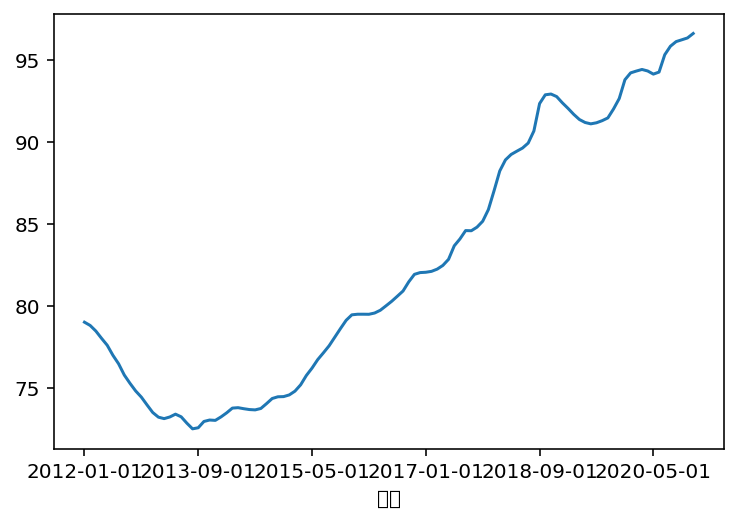

In [ ]:
df.지수.plot()

In [ ]:
# 스케일 조절
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

df_sc = sc.fit_transform(df)

df_sc[:5]

array([[0.26977881, 1.        ],
       [0.26149449, 1.        ],
       [0.24736973, 1.        ],
       [0.22897854, 1.        ],
       [0.21141579, 1.        ]])

In [ ]:
df = pd.DataFrame(df_sc, columns=['지수','기준금리'], index=df.index)
df.head()

,지수,기준금리
년월,,
2012-01-01,0.269779,1.0
2012-02-01,0.261494,1.0
2012-03-01,0.247370,1.0
2012-04-01,0.228979,1.0
2012-05-01,0.211416,1.0


In [ ]:
# 이동평균 구하기
# shift방식을 사용했다는데 복잡해서 rolling사용
df['6개월이동평균'] = df['지수'].rolling(window=6).mean()

In [ ]:
df.dropna(axis=0,inplace=True)
df.head(5)

,지수,기준금리,6개월이동평균
년월,,,
2012-06-01,0.186066,1.000000,0.234184
2012-07-01,0.164527,0.909091,0.216642
2012-08-01,0.136111,0.909091,0.195745
2012-09-01,0.115152,0.909091,0.173708
2012-10-01,0.095808,0.818182,0.151513


In [ ]:
# 트레인 테스트 셋 분리 - 나와있지 않은 것 같아서 임의 분리
train = df.loc[:'2019-06-01',]
test = df.loc['2019-07-01':,]

In [ ]:
train.tail()

,지수,기준금리,6개월이동평균
년월,,,
2019-02-01,0.810579,0.454545,0.831683
2019-03-01,0.795460,0.454545,0.827141
2019-04-01,0.782412,0.454545,0.816730
2019-05-01,0.774874,0.454545,0.804732
2019-06-01,0.771436,0.454545,0.793237


In [ ]:
test.tail()

,지수,기준금리,6개월이동평균
년월,,,
2020-08-01,0.967815,0.0,0.921313
2020-09-01,0.979496,0.0,0.933063
2020-10-01,0.984053,0.0,0.946207
2020-11-01,0.988733,0.0,0.961457
2020-12-01,1.000000,0.0,0.977722


In [ ]:
#train = train.reset_index()
#test = test.reset_index()

In [ ]:
X_train = train[['6개월이동평균','기준금리']]
y_train = train['지수']
X_test = test[['6개월이동평균','기준금리']]
y_test = test['지수']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(85, 2) (85,) (18, 2) (18,)


In [ ]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(85, 2)
(85,)


In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], 2, 1)
X_test_t = X_test.reshape(X_test.shape[0], 2, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(85, 2, 1)


In [ ]:
from sklearn.metrics import mean_squared_error

def model_compile(model,epochs):
  model.compile(loss='mean_squared_error',optimizer='adam')
  model.fit(X_train_t,y_train,epochs=epochs,batch_size=1,verbose=0)

  y_pred = model.predict(X_test_t)
  y_predict = []
  for i in range(len(y_pred)) : 
    y_predict.append(y_pred[i][0][0])
  mse = mean_squared_error(y_test, y_predict)
  rmse = np.sqrt(mse)
  print(rmse)
  return rmse

In [ ]:
model_name = []
rmse_list=[]

In [ ]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

## Single Layer

### epoch 50

In [ ]:
model_1layer_50 = Sequential()
model_1layer_50.add(LSTM(24, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_1layer_50.add(Dense(1))

model_1layer_50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 24)             2496      
_________________________________________________________________
dense (Dense)                (None, 2, 1)              25        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_1layer_50')
rmse = model_compile(model_1layer_50,50)
rmse_list.append(rmse)

0.10344526553670969


### epoch100

In [ ]:
model_1layer_100 = Sequential()
model_1layer_100.add(LSTM(24, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_1layer_100.add(Dense(1))

model_1layer_100.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 24)             2496      
_________________________________________________________________
dense_1 (Dense)              (None, 2, 1)              25        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_1layer_100')
rmse = model_compile(model_1layer_100,100)
rmse_list.append(rmse)

0.07307930865507632


### epoch 150

In [ ]:
model_1layer_150 = Sequential()
model_1layer_150.add(LSTM(24, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_1layer_150.add(Dense(1))

model_1layer_150.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 2, 24)             2496      
_________________________________________________________________
dense_2 (Dense)              (None, 2, 1)              25        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_1layer_150')
rmse = model_compile(model_1layer_150,150)
rmse_list.append(rmse)

0.023929203573146506


## Layer2

### epoch 50

In [ ]:
model_2layer_50 = Sequential()
model_2layer_50.add(LSTM(32, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_2layer_50.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_2layer_50.add(Dense(1))

model_2layer_50.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 2, 32)             4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 2, 16)             3136      
_________________________________________________________________
dense_3 (Dense)              (None, 2, 1)              17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_2layer_50')
rmse = model_compile(model_2layer_50,50)
rmse_list.append(rmse)

0.023625306009622257


### epoch 100

In [ ]:
model_2layer_100 = Sequential()
model_2layer_100.add(LSTM(32, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_2layer_100.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_2layer_100.add(Dense(1))

model_2layer_100.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 2, 32)             4352      
_________________________________________________________________
lstm_6 (LSTM)                (None, 2, 16)             3136      
_________________________________________________________________
dense_4 (Dense)              (None, 2, 1)              17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_2layer_100')
rmse = model_compile(model_2layer_100,100)
rmse_list.append(rmse)

0.0811658372524931


### epoch 150

In [ ]:
model_2layer_150 = Sequential()
model_2layer_150.add(LSTM(32, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_2layer_150.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_2layer_150.add(Dense(1))

model_2layer_150.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 2, 32)             4352      
_________________________________________________________________
lstm_8 (LSTM)                (None, 2, 16)             3136      
_________________________________________________________________
dense_5 (Dense)              (None, 2, 1)              17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_2layer_150')
rmse = model_compile(model_2layer_150,150)
rmse_list.append(rmse)

0.057757523228175234


## Layer4

### epoch 50

In [ ]:
model_4layer_50 = Sequential()
model_4layer_50.add(LSTM(128, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_50.add(LSTM(64, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_50.add(LSTM(32, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_50.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_50.add(Dense(1))

model_4layer_50.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 2, 128)            66560     
_________________________________________________________________
lstm_10 (LSTM)               (None, 2, 64)             49408     
_________________________________________________________________
lstm_11 (LSTM)               (None, 2, 32)             12416     
_________________________________________________________________
lstm_12 (LSTM)               (None, 2, 16)             3136      
_________________________________________________________________
dense_6 (Dense)              (None, 2, 1)              17        
Total params: 131,537
Trainable params: 131,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_4layer_50')
rmse = model_compile(model_4layer_50,50)
rmse_list.append(rmse)

0.02813827032624244


### epoch100

In [ ]:
model_4layer_100 = Sequential()
model_4layer_100.add(LSTM(128, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_100.add(LSTM(64, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_100.add(LSTM(32, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_100.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_100.add(Dense(1))

model_4layer_100.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 2, 128)            66560     
_________________________________________________________________
lstm_14 (LSTM)               (None, 2, 64)             49408     
_________________________________________________________________
lstm_15 (LSTM)               (None, 2, 32)             12416     
_________________________________________________________________
lstm_16 (LSTM)               (None, 2, 16)             3136      
_________________________________________________________________
dense_7 (Dense)              (None, 2, 1)              17        
Total params: 131,537
Trainable params: 131,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_4layer_100')
rmse = model_compile(model_4layer_100,100)
rmse_list.append(rmse)

0.08057471111074284


### epoch150

In [ ]:
model_4layer_150 = Sequential()
model_4layer_150.add(LSTM(128, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_150.add(LSTM(64, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_150.add(LSTM(32, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_150.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_4layer_150.add(Dense(1))

model_4layer_150.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 2, 128)            66560     
_________________________________________________________________
lstm_18 (LSTM)               (None, 2, 64)             49408     
_________________________________________________________________
lstm_19 (LSTM)               (None, 2, 32)             12416     
_________________________________________________________________
lstm_20 (LSTM)               (None, 2, 16)             3136      
_________________________________________________________________
dense_8 (Dense)              (None, 2, 1)              17        
Total params: 131,537
Trainable params: 131,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_name.append('model_4layer_150')
rmse = model_compile(model_4layer_150,150)
rmse_list.append(rmse)

0.05354382679378499


## Layer6

### epoch50

In [ ]:
model_6layer_50 = Sequential()
model_6layer_50.add(LSTM(512, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_50.add(LSTM(256, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_50.add(LSTM(128, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_50.add(LSTM(64, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_50.add(LSTM(32, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_50.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_50.add(Dense(1))

model_6layer_50.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 2, 512)            1052672   
_________________________________________________________________
lstm_22 (LSTM)               (None, 2, 256)            787456    
_________________________________________________________________
lstm_23 (LSTM)               (None, 2, 128)            197120    
_________________________________________________________________
lstm_24 (LSTM)               (None, 2, 64)             49408     
_________________________________________________________________
lstm_25 (LSTM)               (None, 2, 32)             12416     
_________________________________________________________________
lstm_26 (LSTM)               (None, 2, 16)             3136      
_________________________________________________________________
dense_9 (Dense)              (None, 2, 1)             

In [ ]:
model_name.append('model_6layer_50')
rmse = model_compile(model_6layer_50,50)
rmse_list.append(rmse)

0.14321301226324473


### epoch100

In [ ]:
model_6layer_100 = Sequential()
model_6layer_100.add(LSTM(512, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_100.add(LSTM(256, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_100.add(LSTM(128, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_100.add(LSTM(64, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_100.add(LSTM(32, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_100.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_100.add(Dense(1))

model_6layer_100.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 2, 512)            1052672   
_________________________________________________________________
lstm_28 (LSTM)               (None, 2, 256)            787456    
_________________________________________________________________
lstm_29 (LSTM)               (None, 2, 128)            197120    
_________________________________________________________________
lstm_30 (LSTM)               (None, 2, 64)             49408     
_________________________________________________________________
lstm_31 (LSTM)               (None, 2, 32)             12416     
_________________________________________________________________
lstm_32 (LSTM)               (None, 2, 16)             3136      
_________________________________________________________________
dense_10 (Dense)             (None, 2, 1)            

In [ ]:
model_name.append('model_6layer_100')
rmse = model_compile(model_6layer_100,100)
rmse_list.append(rmse)

0.11441506369209427


### epoch 150

In [ ]:
model_6layer_150 = Sequential()
model_6layer_150.add(LSTM(512, 
               input_shape=(X_train_t.shape[1], X_train_t.shape[2]), 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_150.add(LSTM(256, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_150.add(LSTM(128, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_150.add(LSTM(64, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_150.add(LSTM(32, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_150.add(LSTM(16, 
               activation='relu', 
               return_sequences=True)
          )
model_6layer_150.add(Dense(1))

model_6layer_150.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 2, 512)            1052672   
_________________________________________________________________
lstm_34 (LSTM)               (None, 2, 256)            787456    
_________________________________________________________________
lstm_35 (LSTM)               (None, 2, 128)            197120    
_________________________________________________________________
lstm_36 (LSTM)               (None, 2, 64)             49408     
_________________________________________________________________
lstm_37 (LSTM)               (None, 2, 32)             12416     
_________________________________________________________________
lstm_38 (LSTM)               (None, 2, 16)             3136      
_________________________________________________________________
dense_11 (Dense)             (None, 2, 1)            

In [ ]:
model_name.append('model_6layer_150')
rmse = model_compile(model_6layer_150,150)
rmse_list.append(rmse)

0.15713878059583322


## 정리

In [ ]:
result = pd.DataFrame({
    'model' : model_name,
    'rmse' : rmse_list
})
result.to_csv(f'/content/drive/MyDrive/프로젝트/한이음_BBS/기간변경_lstm_result_{min(result.rmse)}.csv')
result

,model,rmse
0,model_1layer_50,0.103445
1,model_1layer_100,0.073079
2,model_1layer_150,0.023929
3,model_2layer_50,0.023625
4,model_2layer_100,0.081166
5,model_2layer_150,0.057758
6,model_4layer_50,0.028138
7,model_4layer_100,0.080575
8,model_4layer_150,0.053544
9,model_6layer_50,0.143213


In [ ]:
min(result.rmse)

0.023625306009622257